In [15]:
import random
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
sns.set_theme()
sns.set_palette('bright')
sns.set(rc={'figure.figsize': (11.7, 8.27)})  # landscape A4

In [5]:
def softmax(vec):
  exponential = np.exp(vec)
  probabilities = exponential / np.sum(exponential)
  return probabilities

# What's going on with Tf-KD?

In [6]:
n = 10
a = 0.9
_a = (1 - a) / (n - 1)
handcrafted = [_a, _a, a, _a, _a, _a, _a, _a, _a, _a ]
# random_dist = [random.uniform(0, 10) for _ in range(10)]

[Text(0.5, 0, 'Class'), Text(0, 0.5, 'Logit')]

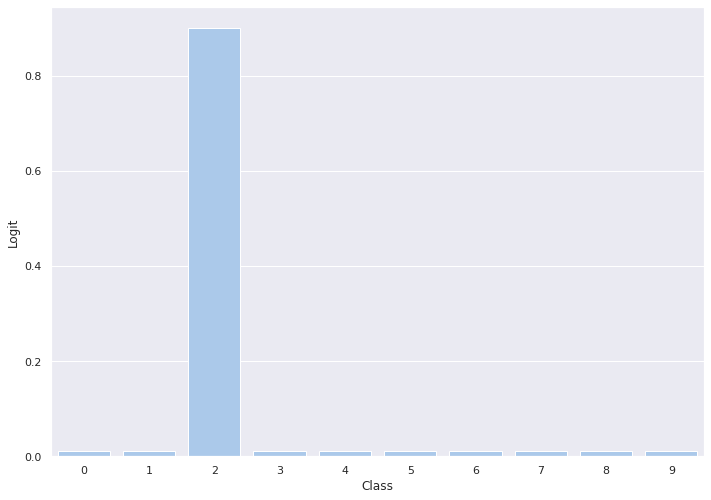

In [7]:
ax = sns.barplot(x=[i for i in range(10)], y=handcrafted, color=sns.color_palette("pastel")[0])
ax.set(xlabel='Class', ylabel='Logit')

In [8]:
plot_data = pd.DataFrame()
plot_data["classes"] = [i for i in range(10)]
plot_data["Virtual Teacher"] = handcrafted
plot_data["Softmax"] = softmax(handcrafted)
plot_data["Temperature Smoothing"] = softmax([i/10 for i in handcrafted])

In [9]:
melt_plot_data = pd.melt(plot_data, id_vars="classes")
melt_plot_data.head()

,classes,variable,value
0,0,Virtual Teacher,0.011111
1,1,Virtual Teacher,0.011111
2,2,Virtual Teacher,0.900000
3,3,Virtual Teacher,0.011111
4,4,Virtual Teacher,0.011111


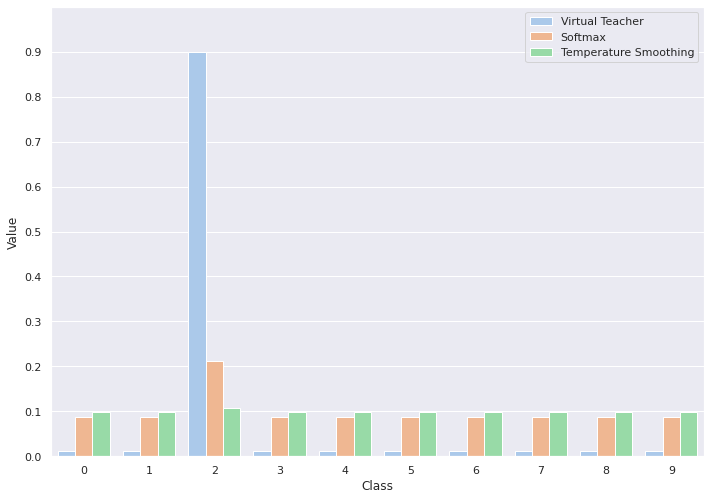

In [10]:
ax = sns.barplot(x="classes", y="value", hue="variable", data=melt_plot_data, palette="pastel")
ax.set(xlabel='Class', ylabel='Value')
ax.legend(title='', loc='upper right')
ax.set_ylim(0.0, 1.0)
ax.set_yticks(np.arange(0, 1, 0.1))

[Text(0.5, 0, 'Class'), Text(0, 0.5, 'Value')]

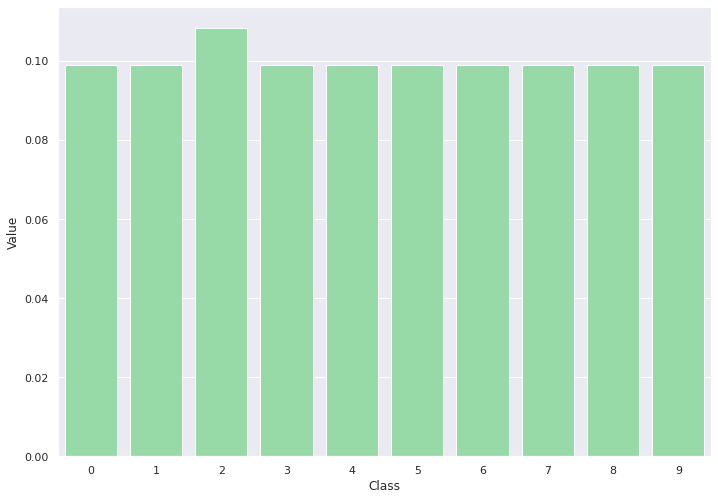

In [11]:
ax = sns.barplot(x=[i for i in range(10)], y=softmax([i/10 for i in handcrafted]), color=sns.color_palette("pastel")[2])
ax.set(xlabel='Class', ylabel='Value')

# Oversampling Experiments

In [19]:
sns.set_theme()
sns.set(rc={'figure.figsize': (11.7, 8.27)})  # landscape A4

In [58]:
palette = sns.color_palette('deep')
palette = palette[0:3] + [palette[4]] + palette[6:]
palette = sns.color_palette(palette, n_colors=8)
palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [20]:
df = pd.read_csv("~/Documents/Thesis/oversampling_results.csv", delimiter=",")
df

,algo,sampling_factor,biased_acc,unbiased_acc
0,baseline,0.0,0.9070,0.9070
1,kd_18,0.0,0.8770,0.8770
2,kd_50,0.0,0.8807,0.8807
3,tf-kd_original,0.0,0.8800,0.8800
4,tf-kd_new,0.0,0.8884,0.8884
5,dml,0.0,0.8790,0.8790
6,baseline,0.2,0.8838,0.8823
7,kd_18,0.2,0.8701,0.8664
8,kd_50,0.2,0.8900,0.8900
9,tf-kd_original,0.2,0.8300,0.8300


In [74]:
small_df = df.mask(df["algo"] == "kd_50").dropna()

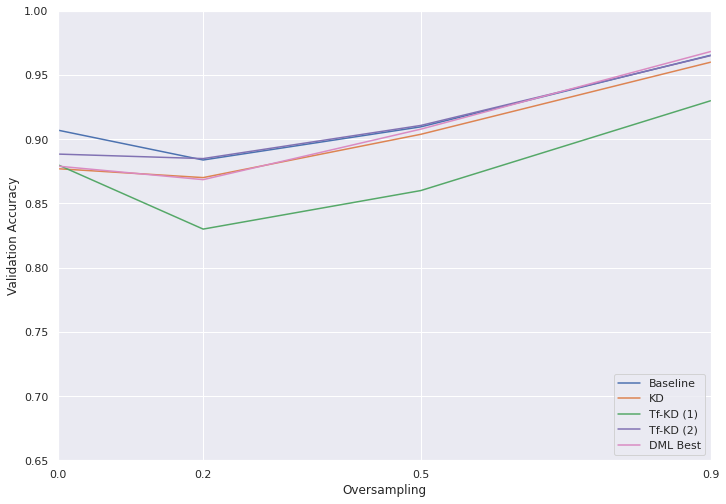

In [79]:
y_key = "biased_acc"

ax = sns.lineplot(data=small_df, x="sampling_factor", y=y_key, hue="algo", palette=palette[:5])
ax.set_xlim(0.0, 0.9)
ax.set_xticks([0.0, 0.2, 0.5, 0.9])
ax.set_ylim(0.65, 1.0)
ax.legend(["Baseline", "KD", "Tf-KD (1)", "Tf-KD (2)", "DML Best"], title='', loc='lower right')
ax.set(xlabel='Oversampling', ylabel='Validation Accuracy')

plt.savefig(f"/home/pia/Pictures/Plots/Thesis/oversampling_{y_key}.pdf", bbox_inches="tight")
plt.savefig(f"/home/pia/Pictures/Plots/Thesis/oversampling_{y_key}.png", bbox_inches="tight")

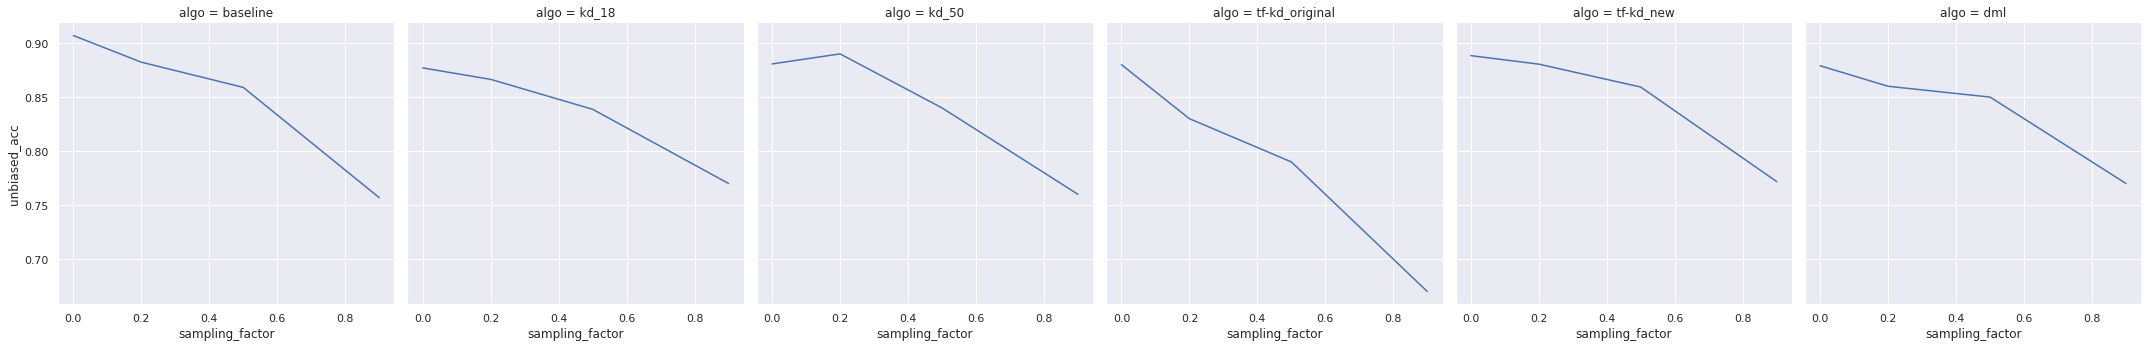

In [37]:
sns.relplot(
    data=df, x="sampling_factor", y=y_key,
    col="algo", kind="line"
)

In [39]:
melt_df = pd.melt(df, id_vars=["sampling_factor", "algo"], value_vars=["biased_acc", "unbiased_acc"])
melt_df

,sampling_factor,algo,variable,value
0,0.0,baseline,biased_acc,0.9070
1,0.0,kd_18,biased_acc,0.8770
2,0.0,kd_50,biased_acc,0.8807
3,0.0,tf-kd_original,biased_acc,0.8800
4,0.0,tf-kd_new,biased_acc,0.8884
5,0.0,dml,biased_acc,0.8790
6,0.2,baseline,biased_acc,0.8838
7,0.2,kd_18,biased_acc,0.8701
8,0.2,kd_50,biased_acc,0.8900
9,0.2,tf-kd_original,biased_acc,0.8300


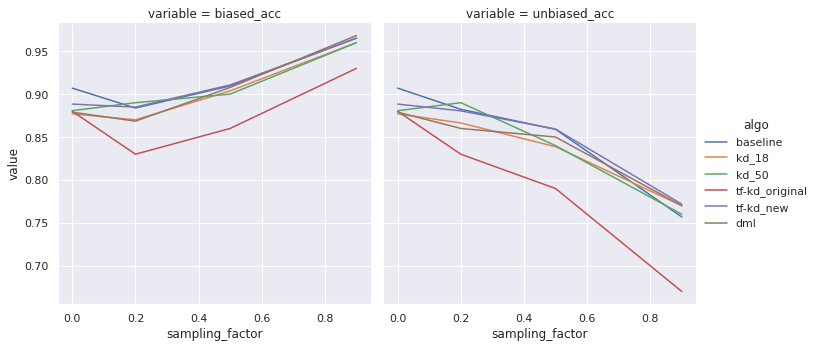

In [49]:
ax = sns.relplot(
    data=melt_df, x="sampling_factor", y="value", hue="algo",
    col="variable", kind="line"
)

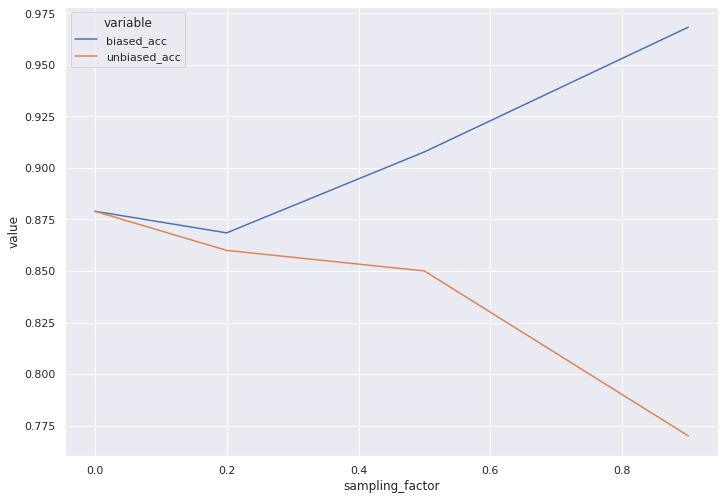

In [47]:
ax = sns.lineplot(data=melt_df[melt_df["algo"] == "dml"], x="sampling_factor", y="value", hue="variable")